<a href="https://colab.research.google.com/github/lucasferreiraos/curso-aprendizado-de-maquina-na-pratica/blob/master/Agrupamento_com_k_means_Consumo_de_%C3%A1lcool_dos_estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    adjusted_rand_score,
    adjusted_mutual_info_score,
    fowlkes_mallows_score
)

from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pré-processamento dos dados

In [2]:
data = pd.read_csv('/content/drive/My Drive/Datasets/student-alcohol-consumption/student-mat.csv')

In [3]:
labels = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for label in labels:
    data[label] = data[label].replace(['yes', 'no'], [1, 0])

In [4]:
data['school'] = data['school'].replace(['GP', 'MS'], [1, 0])
data['sex'] = data['sex'].replace(['F', 'M'], [1, 0])
data['address'] = data['address'].replace(['U', 'R'], [1, 0])
data['famsize'] = data['famsize'].replace(['GT3', 'LE3'], [1, 0])
data['Pstatus'] = data['Pstatus'].replace(['T', 'A'], [1, 0])

In [5]:
label_encoder = LabelEncoder()

data.Mjob = label_encoder.fit_transform(data.Mjob)
data.Fjob = label_encoder.fit_transform(data.Fjob)
data.reason = label_encoder.fit_transform(data.reason)
data.guardian = label_encoder.fit_transform(data.guardian)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


## Ainda sobre modelagem dos dados e sobre o treinamento do modelo de agrupamento com k-means

Antes de mais nada, vale comentar que este dataset é um dataset que veio rotulado com as classes. Essas classes são notas entre 0 e 20 e o desbalanceamento entre as classes tende a ser uma característica desse contexto porque uma turma de alunos tende a ter uma distribuição de notas bastante heterogênea. Com os modelos de classificação foram levantadas três possibilidades de abordagem para o treinamento e análise de performance dos modelos:

- dataset com as classes originais e desbalanceado
- dataset com redimensionamento de classes e desbalanceado (redimensionei para 5 classes)
- dataset com redimensionamento de classes e balanceado

Como estamos trabalhando com agrupamento, as abordagens citadas acima não são interessantes para o caso.

O que pode ser feito aqui é:

- rodar um modelo com `k = 21` (notas de 0 a 20 geram 21 classes)
- rodar um modelo com `k = 5`

### Treinando primeiro modelo com `k = 21`

In [6]:
X = data.iloc[:, :-1]
y = data.G3

X = (X - X.min()) / (X.max() - X.min())
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1.0,1.0,0.428571,1.0,1.0,0.0,1.00,1.00,0.00,1.00,0.000000,0.5,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789
1,1.0,1.0,0.285714,1.0,1.0,1.0,0.25,0.25,0.00,0.50,0.000000,0.0,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158
2,1.0,1.0,0.000000,1.0,0.0,1.0,0.25,0.25,0.00,0.50,0.666667,0.5,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053
3,1.0,1.0,0.000000,1.0,1.0,1.0,1.00,0.50,0.25,0.75,0.333333,0.5,0.000000,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842
4,1.0,1.0,0.142857,1.0,1.0,1.0,0.75,0.75,0.50,0.50,0.333333,0.0,0.000000,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316


In [7]:
kmeans_01 = KMeans(n_clusters=21)
kmeans_01.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=21, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
kmeans_01_labels = kmeans_01.predict(X)

In [9]:
X = X.reset_index(drop=True)

groups = pd.DataFrame(kmeans_01_labels)
X.insert((X.shape[1]),'G3', groups)

In [10]:
grade_0 = X[X['G3']==0]
grade_01 = X[X['G3']==1]
grade_02 = X[X['G3']==2]
grade_03 = X[X['G3']==3]
grade_04 = X[X['G3']==4]
grade_05 = X[X['G3']==5]
grade_06 = X[X['G3']==6]
grade_07 = X[X['G3']==7]
grade_08 = X[X['G3']==8]
grade_09 = X[X['G3']==9]
grade_10 = X[X['G3']==10]
grade_11 = X[X['G3']==11]
grade_12 = X[X['G3']==12]
grade_13 = X[X['G3']==13]
grade_14 = X[X['G3']==14]
grade_15 = X[X['G3']==15]
grade_16 = X[X['G3']==16]
grade_17 = X[X['G3']==17]
grade_18 = X[X['G3']==18]
grade_19 = X[X['G3']==19]
grade_20 = X[X['G3']==20]

In [11]:
plt.rcParams["figure.figsize"] = (10,7)

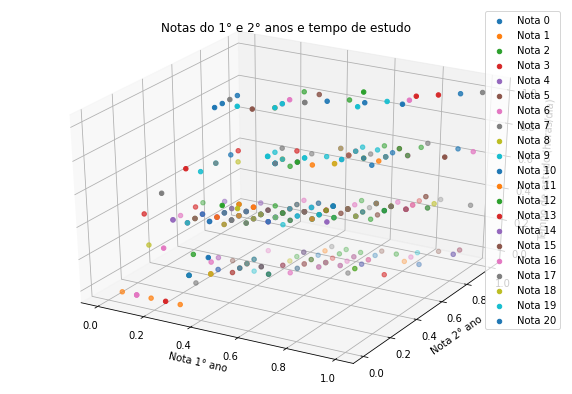

In [12]:
ax = plt.axes(projection='3d')
ax.scatter3D(grade_0.G1, grade_0.G2, grade_0.studytime, s=20, label='Nota 0')
ax.scatter3D(grade_01.G1, grade_01.G2, grade_01.studytime, s=20, label='Nota 1')
ax.scatter3D(grade_02.G1, grade_02.G2, grade_02.studytime, s=20, label='Nota 2')
ax.scatter3D(grade_03.G1, grade_03.G2, grade_03.studytime, s=20, label='Nota 3')
ax.scatter3D(grade_04.G1, grade_04.G2, grade_04.studytime, s=20, label='Nota 4')
ax.scatter3D(grade_05.G1, grade_05.G2, grade_05.studytime, s=20, label='Nota 5')
ax.scatter3D(grade_06.G1, grade_06.G2, grade_06.studytime, s=20, label='Nota 6')
ax.scatter3D(grade_07.G1, grade_07.G2, grade_07.studytime, s=20, label='Nota 7')
ax.scatter3D(grade_08.G1, grade_08.G2, grade_08.studytime, s=20, label='Nota 8')
ax.scatter3D(grade_09.G1, grade_09.G2, grade_09.studytime, s=20, label='Nota 9')
ax.scatter3D(grade_10.G1, grade_10.G2, grade_10.studytime, s=20, label='Nota 10')
ax.scatter3D(grade_11.G1, grade_11.G2, grade_11.studytime, s=20, label='Nota 11')
ax.scatter3D(grade_12.G1, grade_12.G2, grade_12.studytime, s=20, label='Nota 12')
ax.scatter3D(grade_13.G1, grade_13.G2, grade_13.studytime, s=20, label='Nota 13')
ax.scatter3D(grade_14.G1, grade_14.G2, grade_14.studytime, s=20, label='Nota 14')
ax.scatter3D(grade_15.G1, grade_15.G2, grade_15.studytime, s=20, label='Nota 15')
ax.scatter3D(grade_16.G1, grade_16.G2, grade_16.studytime, s=20, label='Nota 16')
ax.scatter3D(grade_17.G1, grade_17.G2, grade_17.studytime, s=20, label='Nota 17')
ax.scatter3D(grade_18.G1, grade_18.G2, grade_18.studytime, s=20, label='Nota 18')
ax.scatter3D(grade_19.G1, grade_19.G2, grade_19.studytime, s=20, label='Nota 19')
ax.scatter3D(grade_20.G1, grade_20.G2, grade_20.studytime, s=20, label='Nota 20')

plt.legend()

ax.set_xlabel('Nota 1° ano')
ax.set_ylabel('Nota 2° ano')
ax.set_zlabel('Tempo de estudo (horas/dia)')

plt.title('Notas do 1° e 2° anos e tempo de estudo')
plt.show()

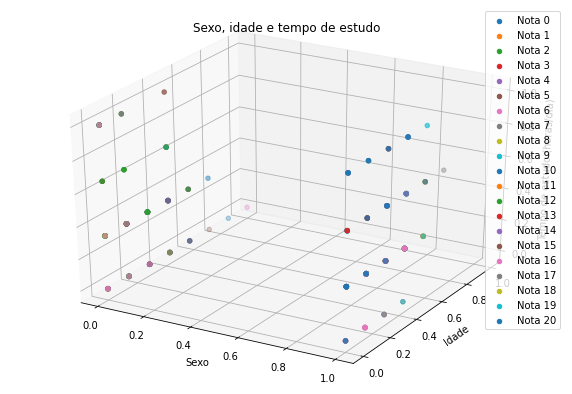

In [13]:
ax = plt.axes(projection='3d')
ax.scatter3D(grade_0.sex, grade_0.age, grade_0.studytime, s=20, label='Nota 0')
ax.scatter3D(grade_01.sex, grade_01.age, grade_01.studytime, s=20, label='Nota 1')
ax.scatter3D(grade_02.sex, grade_02.age, grade_02.studytime, s=20, label='Nota 2')
ax.scatter3D(grade_03.sex, grade_03.age, grade_03.studytime, s=20, label='Nota 3')
ax.scatter3D(grade_04.sex, grade_04.age, grade_04.studytime, s=20, label='Nota 4')
ax.scatter3D(grade_05.sex, grade_05.age, grade_05.studytime, s=20, label='Nota 5')
ax.scatter3D(grade_06.sex, grade_06.age, grade_06.studytime, s=20, label='Nota 6')
ax.scatter3D(grade_07.sex, grade_07.age, grade_07.studytime, s=20, label='Nota 7')
ax.scatter3D(grade_08.sex, grade_08.age, grade_08.studytime, s=20, label='Nota 8')
ax.scatter3D(grade_09.sex, grade_09.age, grade_09.studytime, s=20, label='Nota 9')
ax.scatter3D(grade_10.sex, grade_10.age, grade_10.studytime, s=20, label='Nota 10')
ax.scatter3D(grade_11.sex, grade_11.age, grade_11.studytime, s=20, label='Nota 11')
ax.scatter3D(grade_12.sex, grade_12.age, grade_12.studytime, s=20, label='Nota 12')
ax.scatter3D(grade_13.sex, grade_13.age, grade_13.studytime, s=20, label='Nota 13')
ax.scatter3D(grade_14.sex, grade_14.age, grade_14.studytime, s=20, label='Nota 14')
ax.scatter3D(grade_15.sex, grade_15.age, grade_15.studytime, s=20, label='Nota 15')
ax.scatter3D(grade_16.sex, grade_16.age, grade_16.studytime, s=20, label='Nota 16')
ax.scatter3D(grade_17.sex, grade_17.age, grade_17.studytime, s=20, label='Nota 17')
ax.scatter3D(grade_18.sex, grade_18.age, grade_18.studytime, s=20, label='Nota 18')
ax.scatter3D(grade_19.sex, grade_19.age, grade_19.studytime, s=20, label='Nota 19')
ax.scatter3D(grade_20.sex, grade_20.age, grade_20.studytime, s=20, label='Nota 20')

plt.legend()

ax.set_xlabel('Sexo')
ax.set_ylabel('Idade')
ax.set_zlabel('Tempo de estudo (horas/dia)')

plt.title('Sexo, idade e tempo de estudo')
plt.show()

In [14]:
plt.rcParams["figure.figsize"] = (25,20)

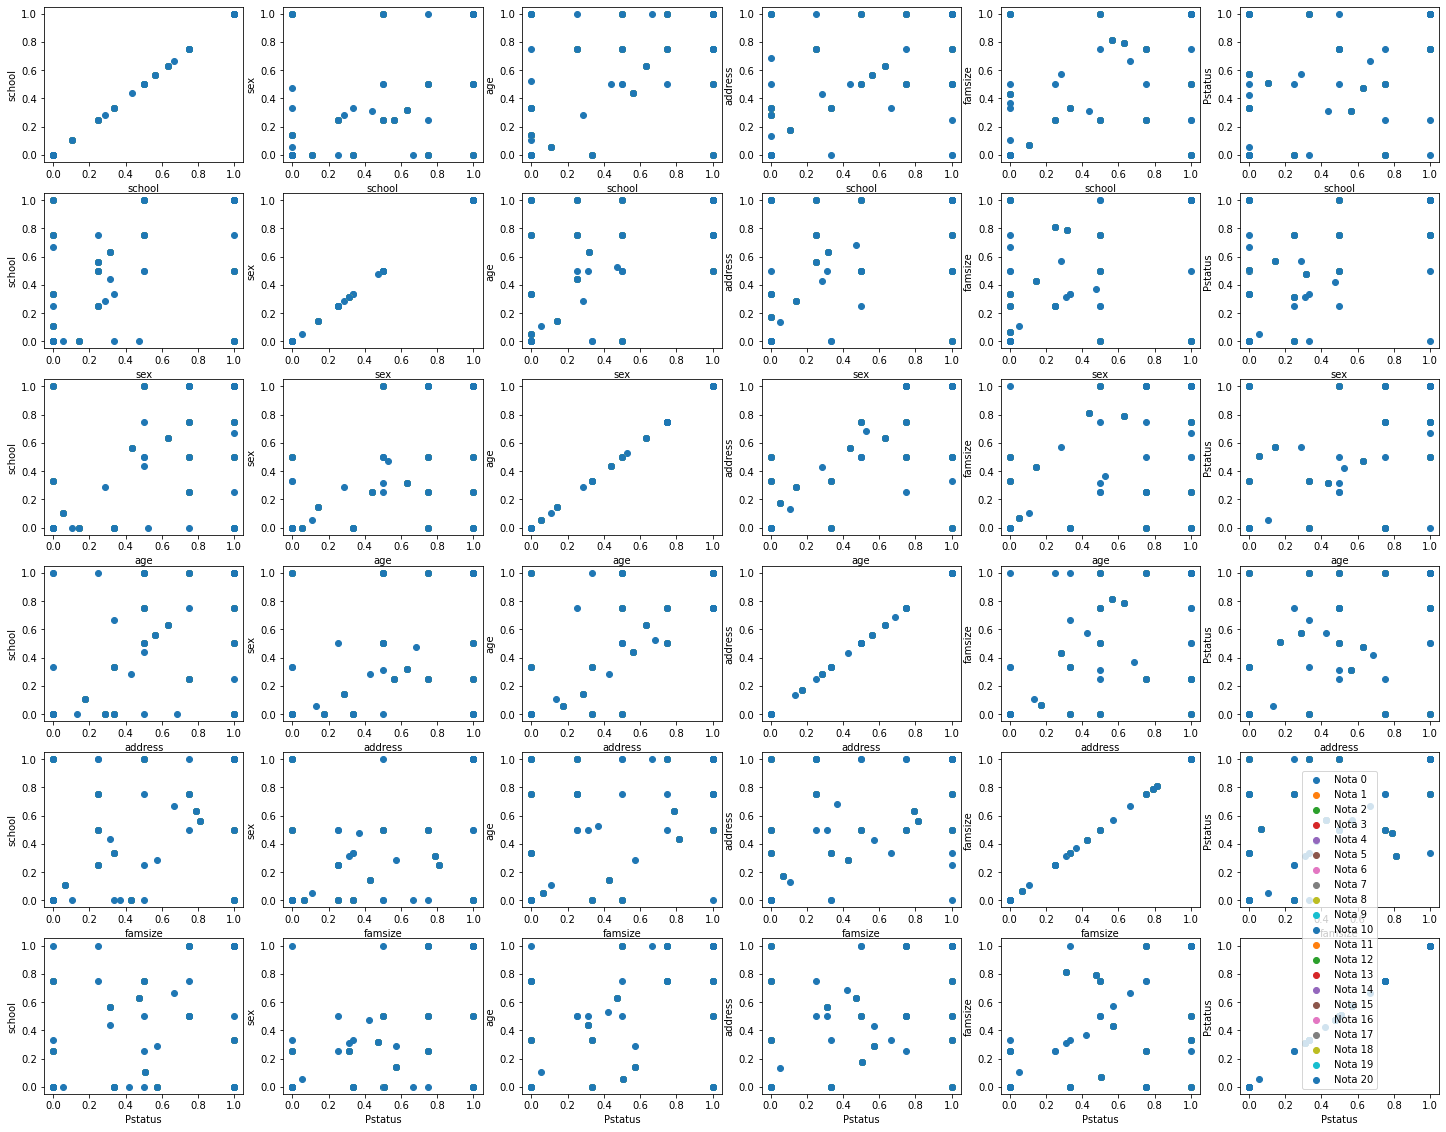

In [15]:
fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(grade_0.iloc[i],grade_0.iloc[j],label='Nota 0')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 1')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 2')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 3')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 4')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 5')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 6')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 7')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 8')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 9')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 10')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 11')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 12')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 13')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 14')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 15')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 16')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 17')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 18')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 19')
    axs[i,j].scatter(grade_01.iloc[i],grade_01.iloc[j],label='Nota 20')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

In [16]:
acuracia_01 = accuracy_score(y, kmeans_01_labels)
print(round(acuracia_01, 3) * 100)

5.6000000000000005


In [17]:
rand_score_01 = adjusted_rand_score(y,kmeans_01_labels)
mutual_info_01 = adjusted_mutual_info_score(y, kmeans_01_labels)
fm_01 = fowlkes_mallows_score(y, kmeans_01_labels)

print(f'Rand score: {(round(rand_score_01, 3))}')
print(f'Mutual info score: {round(mutual_info_01, 3)}')
print(f'Fowlkes-Mallows score: {round(fm_01, 3)}')

Rand score: 0.005
Mutual info score: 0.019
Fowlkes-Mallows score: 0.07


## Discutindo os resultados do primeiro modelo

Bem, os gráficos pós treinamento e as métricas mostraram um performance muito ruim quando tentamos um modelo com `k = 21`, que seria o número de classes original do dataset. Tivemos 5.1% de acurácia e, apesar dessa métrica ser pouco utlizada para avaliar modelos de agrupamento, é um número expressivo que mostra o quão ruim o modelo performou.

O mesmo resultado baixo segue se refletindo no índice rand, nos scores baseados em informação mútua e nos scores de Fowlkes-Mallows, que ficaram bem próximos de zero.

O número de grupos que foi definido (`k = 21`) é um número muito alto para a tarefa de agrupamento, tanto é que não conseguimos obter uma informação relevante ao observar os gráficos. Nos scatter plot 3D não é possível obter alguma informação porque a paleta de cores para os pontos é bem menor que o número de grupos e na matriz de scatter plot não conseguimos ver todos os grupos.

Qual ou quais as razões para o modelo ter tido um performance tão ruim? Um motivo pode ser o valor de `k` escolhido que foi de 21, o mesmo número de classes possíveis no dataset.É um número considerado muito alto para agrupamento como já foi dito anteriormente, que pode fazer com o que o modelo não consiga definir os grupos. Um outro ponto bem delicado é que o dataset não possui todos os rótulos. Ou seja, alguns alunos não tiraram nota 12, por exemplo, e essa classe não está presente no dataset.



## Segundo modelo

A segunda abordagem que foi citada anteriormente seria a de treinar um modelo com `k = 5`. E já que temos as classes conhecidas nesse caso, vamos fazer o redimensionamento das classes antes de rodar um novo modelo.

O redimensionamento vai resolver o problema citado anteriormente, que é o problema de o dataset não ter todos os rótulos possíveis definidos na descrição do problema ([ver descrição aqui](https://github.com/lucasferreiraos/curso-aprendizado-de-maquina-na-pratica/blob/master/Consumo_de_%C3%A1lcool_de_estudantes.ipynb)).

In [18]:
data['G3'] = data['G3'].replace([0, 1, 2, 3, 4],  0)
data['G3'] = data['G3'].replace([5, 6, 7, 8],     1)
data['G3'] = data['G3'].replace([9, 10, 11, 12],  2)
data['G3'] = data['G3'].replace([13, 14, 15, 16], 3)
data['G3'] = data['G3'].replace([17, 18, 19, 20], 4)

In [19]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,1
1,1,1,17,1,1,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,1
2,1,1,15,1,0,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,2
3,1,1,15,1,1,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,3
4,1,1,16,1,1,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,2


In [20]:
X = data.iloc[:,:-1]
y = data.G3

X = (X - X.min()) / (X.max() - X.min())

In [21]:
kmeans_02 = KMeans(n_clusters=5)
kmeans_02.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans_02_labels = kmeans_02.predict(X)

In [23]:
X = X.reset_index(drop=True)

groups = pd.DataFrame(kmeans_02_labels)
X.insert((X.shape[1]),'G3', groups)

In [24]:
class_0 = X[X['G3']==0]
class_1 = X[X['G3']==1]
class_2 = X[X['G3']==2]
class_3 = X[X['G3']==3]
class_4 = X[X['G3']==4]

In [25]:
plt.rcParams["figure.figsize"] = (10,7)

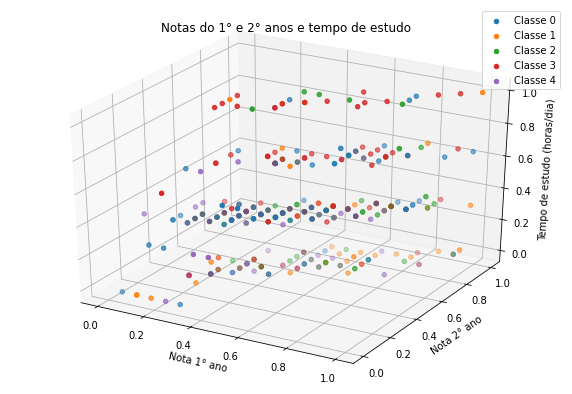

In [28]:
ax = plt.axes(projection='3d')
ax.scatter3D(class_0.G1, class_0.G2, class_0.studytime, s=20, label='Classe 0')
ax.scatter3D(class_1.G1, class_1.G2, class_1.studytime, s=20, label='Classe 1')
ax.scatter3D(class_2.G1, class_2.G2, class_2.studytime, s=20, label='Classe 2')
ax.scatter3D(class_3.G1, class_3.G2, class_3.studytime, s=20, label='Classe 3')
ax.scatter3D(class_4.G1, class_4.G2, class_4.studytime, s=20, label='Classe 4')

plt.legend()

ax.set_xlabel('Nota 1° ano')
ax.set_ylabel('Nota 2° ano')
ax.set_zlabel('Tempo de estudo (horas/dia)')

plt.title('Notas do 1° e 2° anos e tempo de estudo')
plt.show()

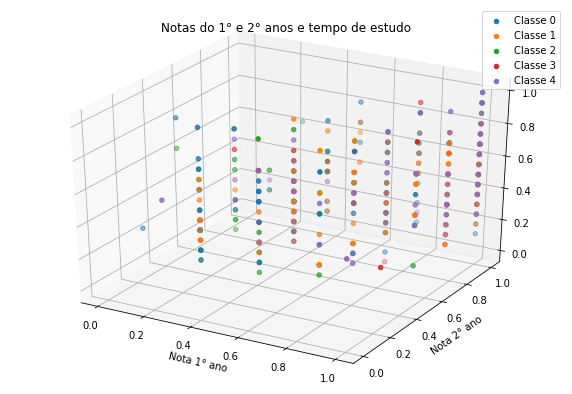

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(class_0.Medu, class_0.Fedu, class_0.G1, s=20, label='Classe 0')
ax.scatter3D(class_1.Medu, class_1.Fedu, class_1.G1, s=20, label='Classe 1')
ax.scatter3D(class_2.Medu, class_2.Fedu, class_2.G1, s=20, label='Classe 2')
ax.scatter3D(class_3.Medu, class_3.Fedu, class_3.G1, s=20, label='Classe 3')
ax.scatter3D(class_4.Medu, class_4.Fedu, class_4.G1, s=20, label='Classe 4')

plt.legend()

ax.set_xlabel('Nível de escolaridade da mãe')
ax.set_ylabel('Nível de escolaridade do pai')
ax.set_zlabel('Nota do 1° ano')

plt.title('Nível de escolaridade dos pais e nota do 1° ano')
plt.show()

In [30]:
plt.rcParams["figure.figsize"] = (25,20)

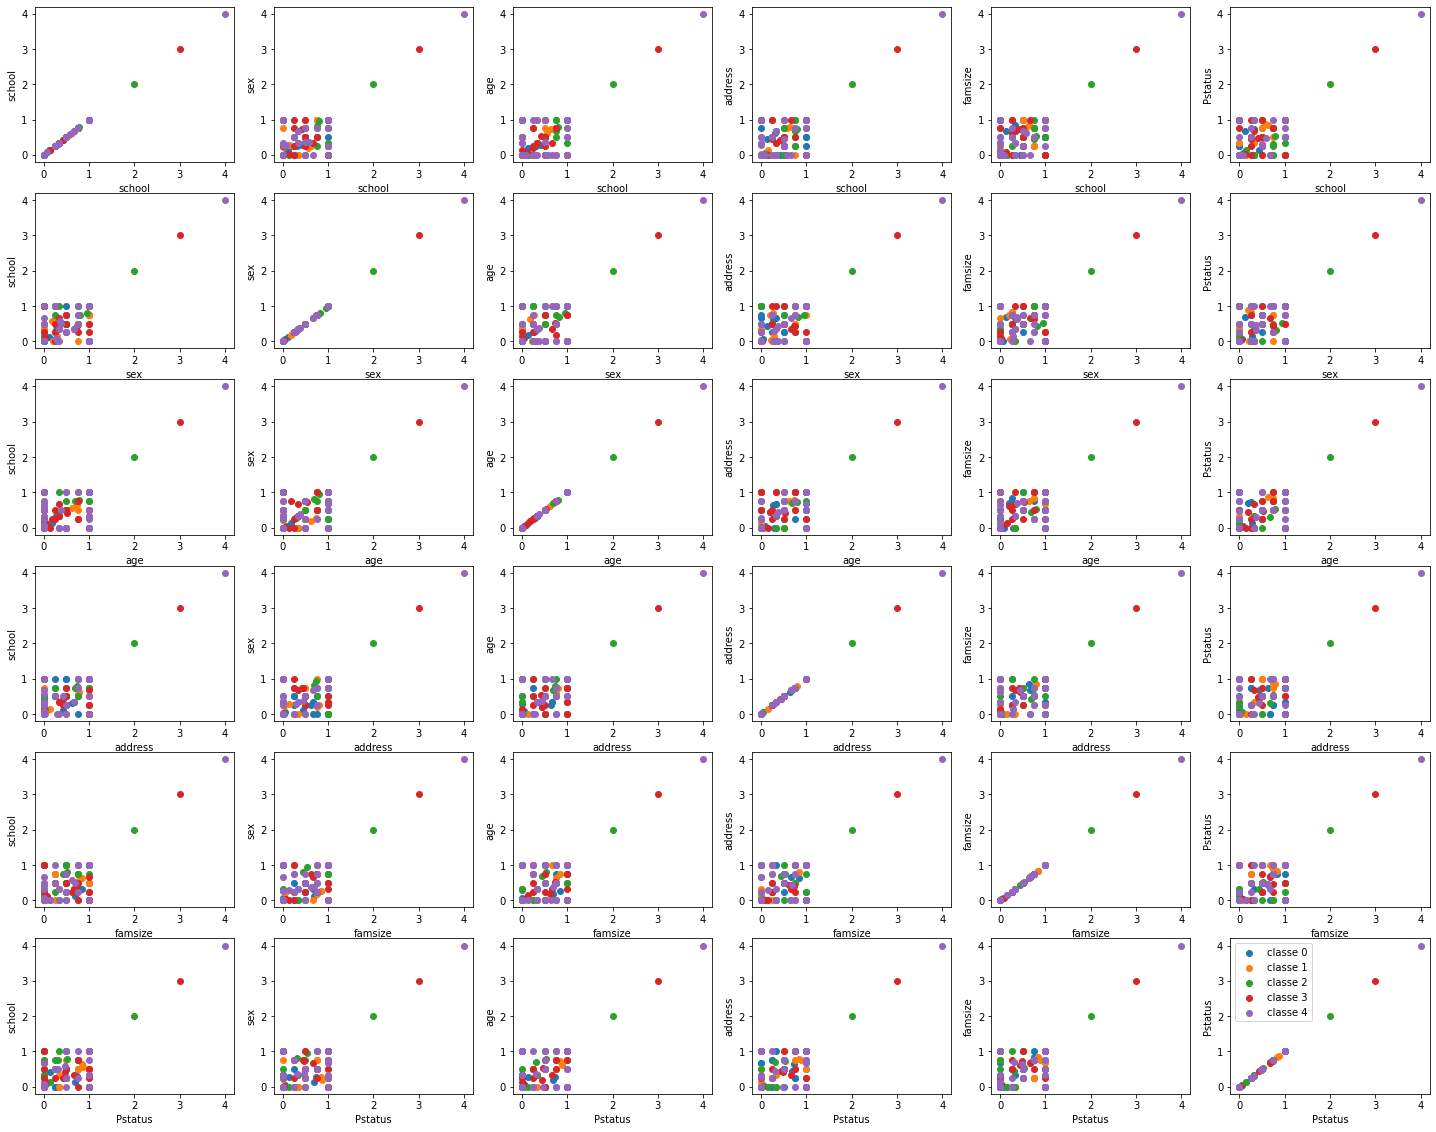

In [32]:
fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(class_0.iloc[i],class_0.iloc[j],label='classe 0')
    axs[i,j].scatter(class_1.iloc[i],class_1.iloc[j],label='classe 1')
    axs[i,j].scatter(class_2.iloc[i],class_2.iloc[j],label='classe 2')
    axs[i,j].scatter(class_3.iloc[i],class_3.iloc[j],label='classe 3')
    axs[i,j].scatter(class_4.iloc[i],class_4.iloc[j],label='classe 4')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()


In [33]:
acuracia_02 = accuracy_score(y, kmeans_02_labels)
print(round(acuracia_01, 3) * 100)

5.6000000000000005


In [34]:
rand_score_02 = adjusted_rand_score(y,kmeans_02_labels)
mutual_info_02 = adjusted_mutual_info_score(y, kmeans_02_labels)
fm_02 = fowlkes_mallows_score(y, kmeans_02_labels)

print(f'Rand score: {(round(rand_score_02, 3))}')
print(f'Mutual info score: {round(mutual_info_02, 3)}')
print(f'Fowlkes-Mallows score: {round(fm_02, 3)}')

Rand score: 0.008
Mutual info score: 0.022
Fowlkes-Mallows score: 0.248


## Discutindo os resultados do segundo modelo

Depois de treinar o segundo modelo ainda temos números bem baixos na acurácia e nos outros scores, semelhantes aos resultados do primeiro modelo.

Os gráficos 3D ainda são difíceis de extrair alguma informação relevante e, na matriz de scatter, podemos ver todos os grupos e podemos ver que eles estão agrupados sempre em uma única região da figura nos mostrando que, para cada comparação 2 a 2 dos atributos que foram exibidos, a maioria das instâncias dos grupos tendem a ter uma característica semelhante e também podemos observar alguns outliers, que são instâncias que possuem outro tipo de relação entre os atributos.


## Conclusões

Esse dataset sugere uma abordagem com aprendizado supervisionado. A sua variável alvo nos dá um número de classes possíveis muito alto que, a priori, já impõe uma certa complexidade para um modelo classificador conseguir ser generalista. 

A prova disso foram os resultados onde os primeiros modelos com o dataset sofrendo pequenos ajustes de pré-processamento tiveram acurácia abaixo de 50% e, após o redimensionamento das classes, diminuindo o número para 5, obtivemos resultados bem mais satisfatórios, chegando na casa dos 90% de acurácia.

Na primeira atividade, que foi puramente análise exploratória, notou-se que a correlação entre as variáveis era muito baixa e mesmo assim, nas atividades seguintes, os classificadores conseguiram alcançar bons resultados. Provavelmente essas correlações muito baixas foram um fator determinante para que o k-means não conseguisse ter êxito diante do dataset.